In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'E:\shopwise.csv')
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
print(df.nunique())

#The dataset has 499 rows and 11 columns.
#Several columns (e.g., Tenure, WarehouseToHome, DaySinceLastOrder) have missing values.
#The dataset includes categorical (PreferedOrderCat, MaritalStatus) and numerical columns.
#Interpretation: This cell helps understand the structure, completeness, and distribution of the data. It provides a foundation for further cleaning and analysis.



   Tenure  WarehouseToHome  NumberOfDeviceRegistered    PreferedOrderCat  \
0    15.0             29.0                         4  Laptop & Accessory   
1     7.0             25.0                         4              Mobile   
2    27.0             13.0                         3  Laptop & Accessory   
3    20.0             25.0                         4             Fashion   
4    30.0             15.0                         4              Others   

   SatisfactionScore MaritalStatus  NumberOfAddress  Complain  \
0                  3        Single                2         0   
1                  1       Married                2         0   
2                  1       Married                5         0   
3                  3      Divorced                7         0   
4                  4        Single                8         0   

   DaySinceLastOrder  CashbackAmount  Churn  
0                7.0             143      0  
1                7.0             129      0  
2             

In [3]:
# Check for missing values in the dataset
# Impute missing values with the mean for numerical columns and mode for categorical columns

print(df.isnull().sum())
print(df.isnull().mean()*100)
for col in df.columns :
    if(df[col].dtype=="object"):
        df[col].fillna(df[col].mode()[0],inplace=True)
    else : 
        df[col].fillna(df[col].median(),inplace=True)
print(df.isnull().sum())

# Interpretation:
# - Ensure that no missing values remain after the imputation process.
# - Helps to confirm that the missing values were handled properly

Tenure                      26
WarehouseToHome             26
NumberOfDeviceRegistered     0
PreferedOrderCat             0
SatisfactionScore            0
MaritalStatus                0
NumberOfAddress              0
Complain                     0
DaySinceLastOrder           37
CashbackAmount               0
Churn                        0
dtype: int64
Tenure                      5.210421
WarehouseToHome             5.210421
NumberOfDeviceRegistered    0.000000
PreferedOrderCat            0.000000
SatisfactionScore           0.000000
MaritalStatus               0.000000
NumberOfAddress             0.000000
Complain                    0.000000
DaySinceLastOrder           7.414830
CashbackAmount              0.000000
Churn                       0.000000
dtype: float64
Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain      

C:\Users\HP\AppData\Local\Temp\ipykernel_12232\831415320.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_12232\831415320.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

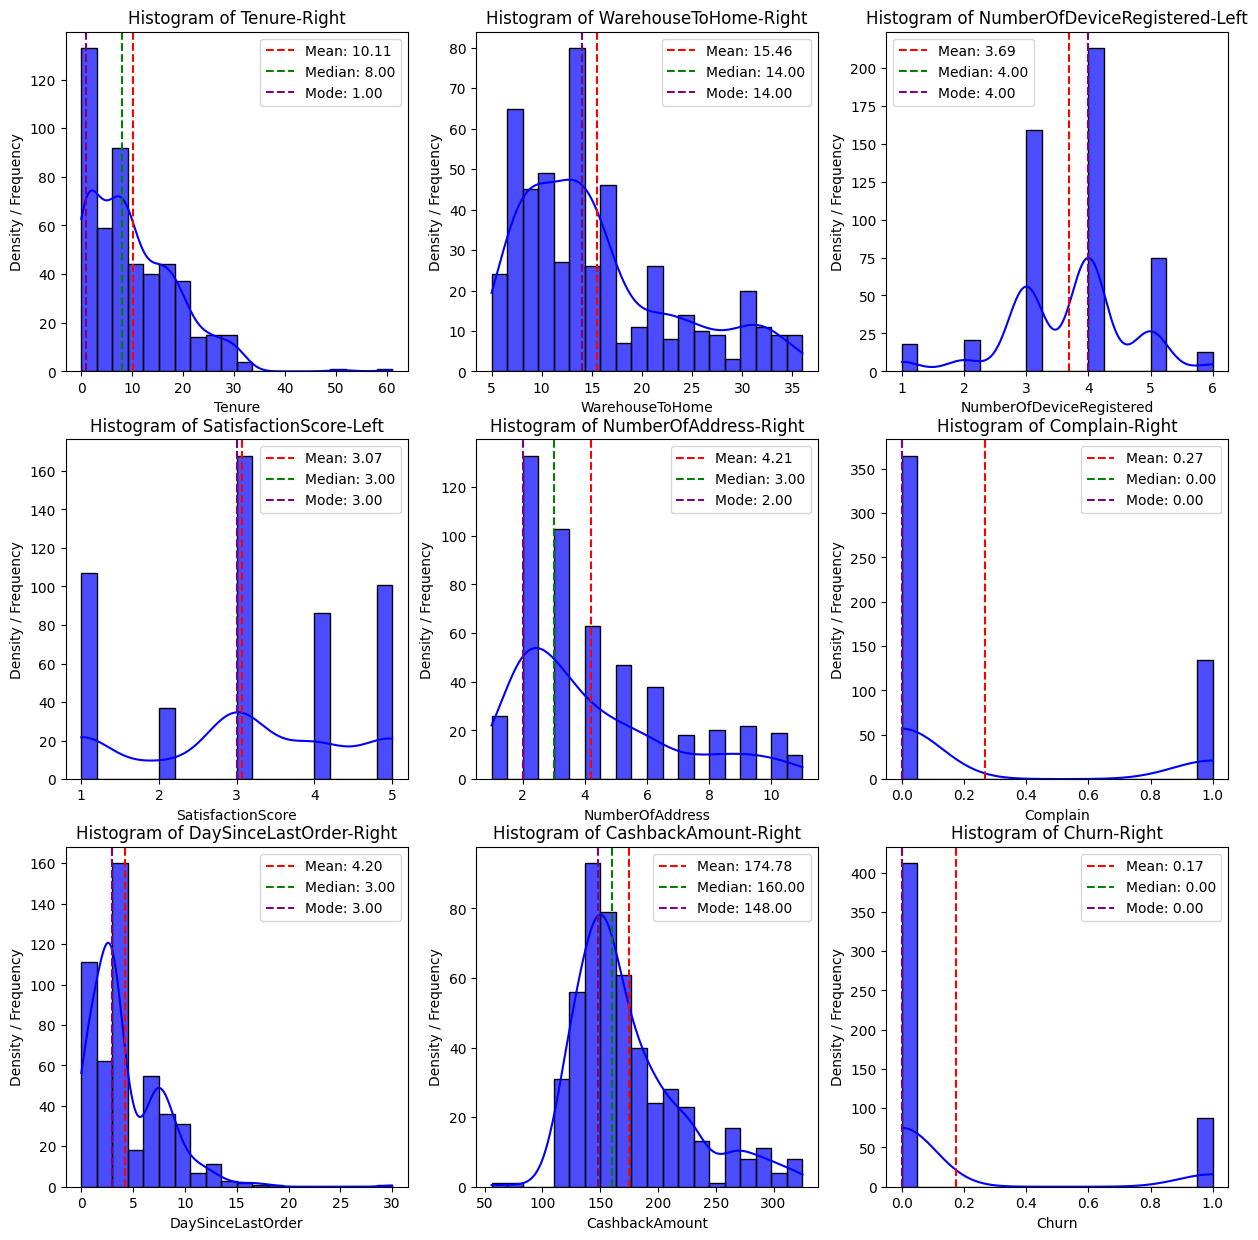

In [4]:
# Univariate Analysis : Plot histograms and check skewness for all numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
rows = (len(numerical_columns) // 3) + (1 if len(numerical_columns) % 3 != 0 else 0)
cols = min(len(numerical_columns), 3)

plt.figure(figsize=(15, rows * 5))
for i, col in enumerate(numerical_columns, 1):
    # Mean, Median, and Skewness Calculation
    mean = df[col].mean()
    median = df[col].median()
    skewness = df[col].skew()

    # Determine skewness type
    if skewness > 0:
        skew='Right'
    elif skewness < 0:
        skew='Left'
    else:
        skew='No skew'

    plt.subplot(rows, cols, i)  
    sns.histplot(df[col], kde=True, bins=20, color='blue', alpha=0.7)
    
    # Add mean, median, and mode lines
    mode_val = df[col].mode()[0]
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='--', label=f'Median: {median:.2f}')
    plt.axvline(mode_val, color='purple', linestyle='--', label=f'Mode: {mode_val:.2f}')
    
    # Titles and labels
    plt.title(f"Histogram of {col}-{skew}")
    plt.xlabel(col)
    plt.ylabel("Density / Frequency")
    plt.legend()

#Interpreation : Most columns exhibit right skew, indicating the presence of a few outliers or extreme values.
#Columns like NumberOfDeviceRegistered and SatisfactionScore are less skewed, suggesting more balanced distributions.
#Outliers in CashbackAmount, Churn, and NumberOfDeviceRegistered could represent important anomalies or unique customer behaviors worth investigating further


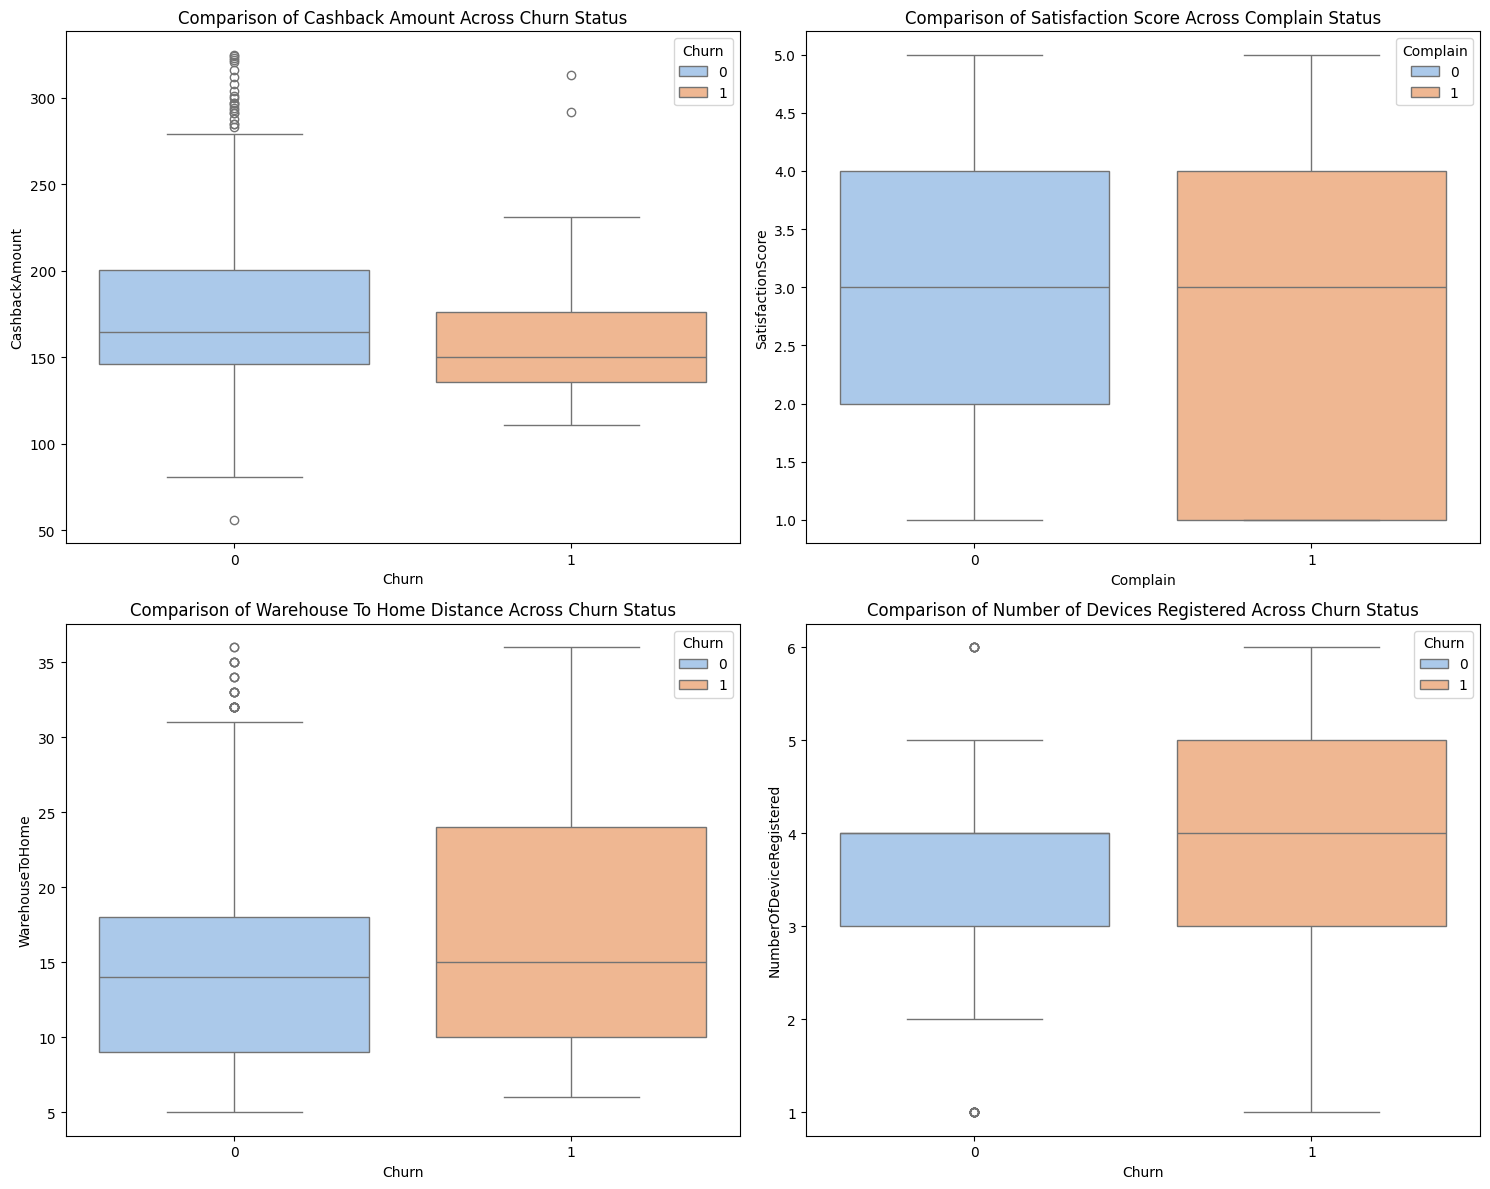

In [5]:
# Generate boxplots for the dataset to analyze relationships and outliers

# Set the pastel color palette
sns.set_palette("pastel")

# Create a figure for boxplots
plt.figure(figsize=(15, 12))

# Boxplot 1: Compare numerical columns (e.g., CashbackAmount) across categorical variables (e.g., Churn)
plt.subplot(2, 2, 1)
sns.boxplot(x='Churn', y='CashbackAmount', data=df, hue='Churn')
plt.title('Comparison of Cashback Amount Across Churn Status')

# Boxplot 2: Compare numerical columns (e.g., SatisfactionScore) across another categorical variable (e.g., Complain)
plt.subplot(2, 2, 2)
sns.boxplot(x='Complain', y='SatisfactionScore', data=df, hue='Complain')
plt.title('Comparison of Satisfaction Score Across Complain Status')

# Boxplot 3: Compare numerical columns (e.g., WarehouseToHome) across a categorical variable (e.g., Churn)
plt.subplot(2, 2, 3)
sns.boxplot(x='Churn', y='WarehouseToHome', data=df, hue='Churn')
plt.title('Comparison of Warehouse To Home Distance Across Churn Status')

# Boxplot 4: Compare numerical columns (e.g., NumberOfDeviceRegistered) across a categorical variable (e.g., Churn)
plt.subplot(2, 2, 4)
sns.boxplot(x='Churn', y='NumberOfDeviceRegistered', data=df, hue='Churn')
plt.title('Comparison of Number of Devices Registered Across Churn Status')

# Adjust layout and display plots
plt.tight_layout()
plt.show()

#interpretation:
#Comparison of Cashback Amount Across Churn Status:
#Dots above the whiskers indicate customers with unusually high cashback amounts.
#The central line in the box shows the typical cashback amount for each churn category.
#SNon-churn customers generally have a narrower range of cashback amounts compared to churned customers.

#Comparison of Satisfaction Score Across Complain Status:
#Few outliers are visible for complain status, showing extreme satisfaction scores.
#Customers with no complaints have slightly higher median satisfaction scores.
#DSatisfaction scores are more varied for customers who have complaints.

#Comparison of Warehouse To Home Distance Across Churn Status:
#There are outliers for longer distances, particularly for non-churn customers.
#Customers who churn tend to have slightly shorter median distances compared to non-churn customers.
#The distance distribution is wider for non-churn customers.

#Comparison of Number of Devices Registered Across Churn Status:
#A few outliers exist for customers registering an unusually high number of devices.
#Non-churn customers tend to register slightly more devices than churned customers.
#The distribution of registered devices is more concentrated for non-churn customers.


C:\Users\HP\AppData\Local\Temp\ipykernel_12232\787208940.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='pastel')
C:\Users\HP\AppData\Local\Temp\ipykernel_12232\787208940.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='pastel')


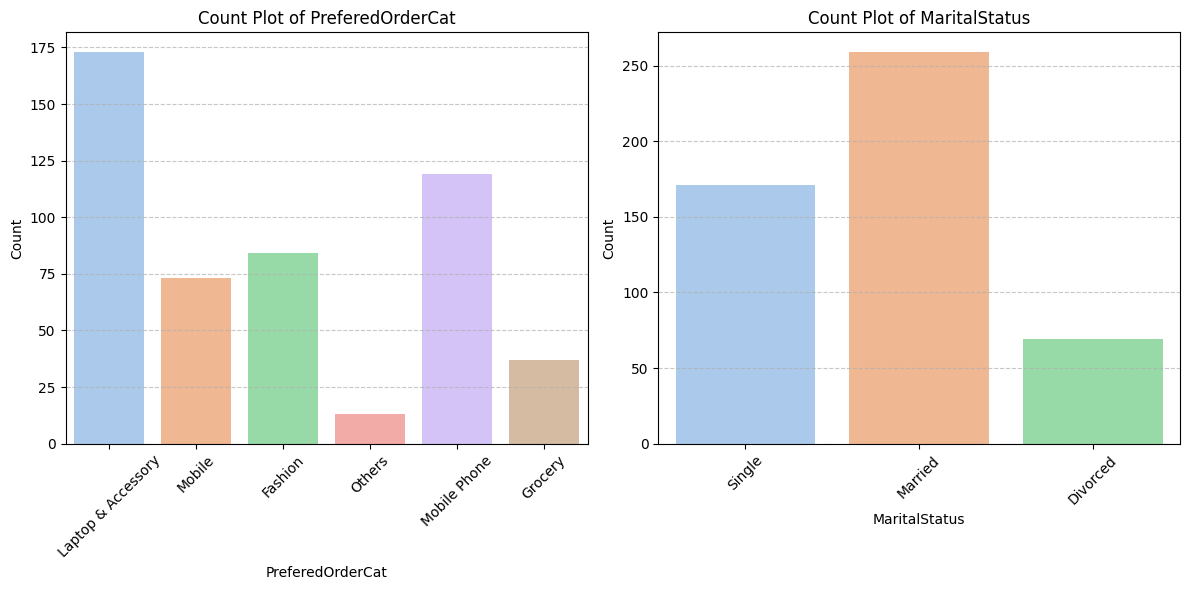

In [6]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Plotting count plots for all categorical columns in one figure
plt.figure(figsize=(12, 6))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 2, i)  # Adjust the layout for two categorical columns
    sns.countplot(x=column, data=df, palette='pastel')
    plt.title(f"Count Plot of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#PreferedOrderCat:
#The most common category is "Laptop & Accessory."
#Categories such as "Mobile" and "Fashion" are also popular.
#Other categories have relatively lower counts, indicating less preference among users.

#MaritalStatus:

#The majority of the customers are "Married."
#"Single" is the second most common status.
#"Divorced" has the lowest count, suggesting fewer customers in this group.

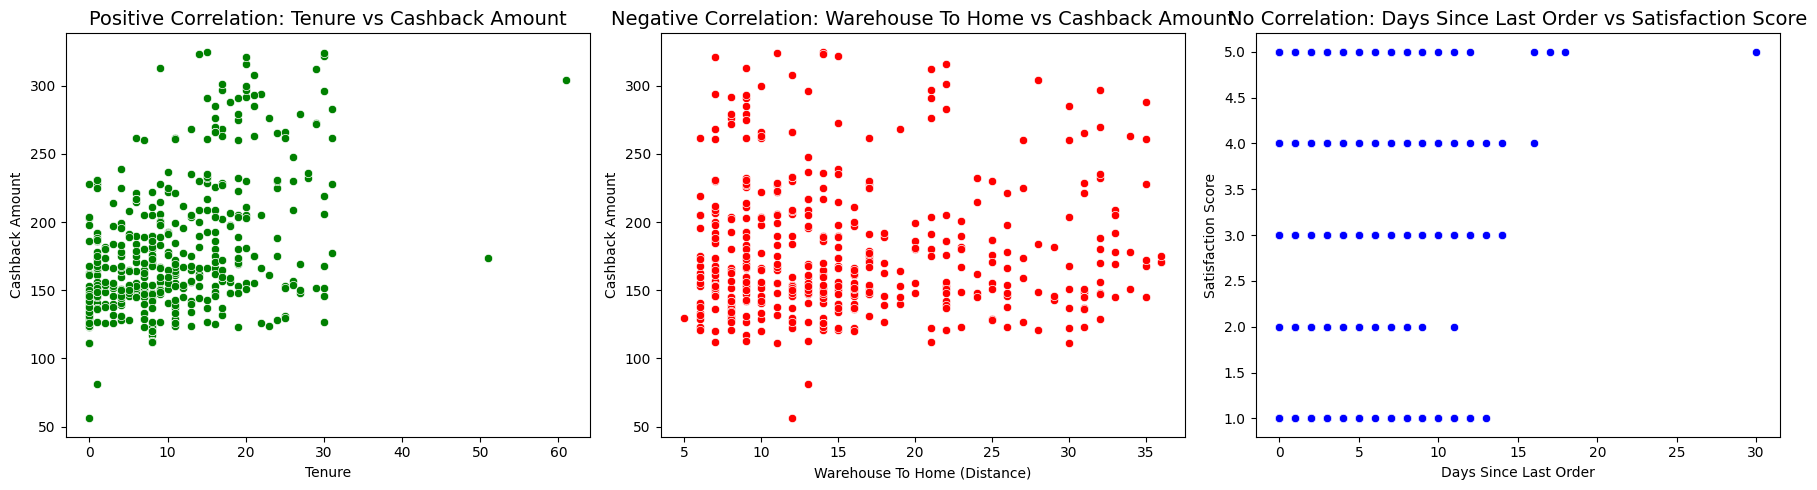

In [7]:
# Displaying the scatter plots to identify correlations in the dataset
plt.figure(figsize=(18, 5))

# Positive Correlation example: CashbackAmount vs. Tenure
plt.subplot(1, 3, 1)
sns.scatterplot(x='Tenure', y='CashbackAmount', data=df, color='green')
plt.title('Positive Correlation: Tenure vs Cashback Amount', fontsize=14)
plt.xlabel('Tenure')
plt.ylabel('Cashback Amount')

# Negative Correlation example: WarehouseToHome vs. CashbackAmount
plt.subplot(1, 3, 2)
sns.scatterplot(x='WarehouseToHome', y='CashbackAmount', data=df, color='red')
plt.title('Negative Correlation: Warehouse To Home vs Cashback Amount', fontsize=14)
plt.xlabel('Warehouse To Home (Distance)')
plt.ylabel('Cashback Amount')

# No Correlation example: DaySinceLastOrder vs. SatisfactionScore
plt.subplot(1, 3, 3)
sns.scatterplot(x='DaySinceLastOrder', y='SatisfactionScore', data=df, color='blue')
plt.title('No Correlation: Days Since Last Order vs Satisfaction Score', fontsize=14)
plt.xlabel('Days Since Last Order')
plt.ylabel('Satisfaction Score')

plt.tight_layout()
plt.show()

#Positive Correlation: Tenure vs Cashback Amount
#As the Tenure increases, the CashbackAmount generally increases.
#This indicates a positive relationship where customers with longer tenure receive higher cashback amounts.

#Negative Correlation: Warehouse To Home vs Cashback Amount
#As the distance (WarehouseToHome) increases, the CashbackAmount decreases.
#This suggests that customers closer to the warehouse tend to receive higher cashback amounts, possibly due to cost savings.

#No Correlation: Days Since Last Order vs Satisfaction Score
#There is no clear trend between DaySinceLastOrder and SatisfactionScore.
#The satisfaction score does not appear to depend on the number of days since the last order.

C:\Users\HP\AppData\Local\Temp\ipykernel_12232\1473455543.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Tenure'])


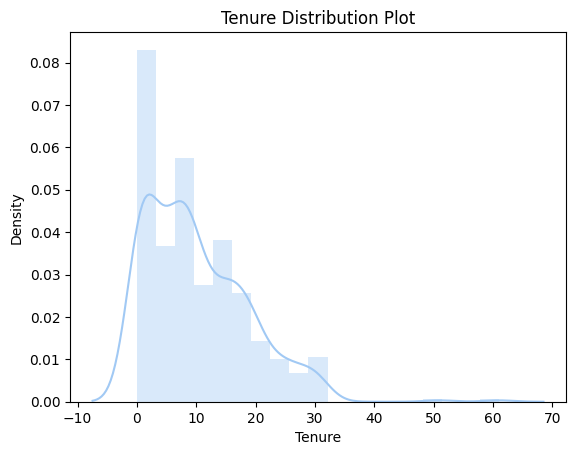

In [8]:
# Data distribution
plt.title('Tenure Distribution Plot')
sns.distplot(df['Tenure'])
plt.show()

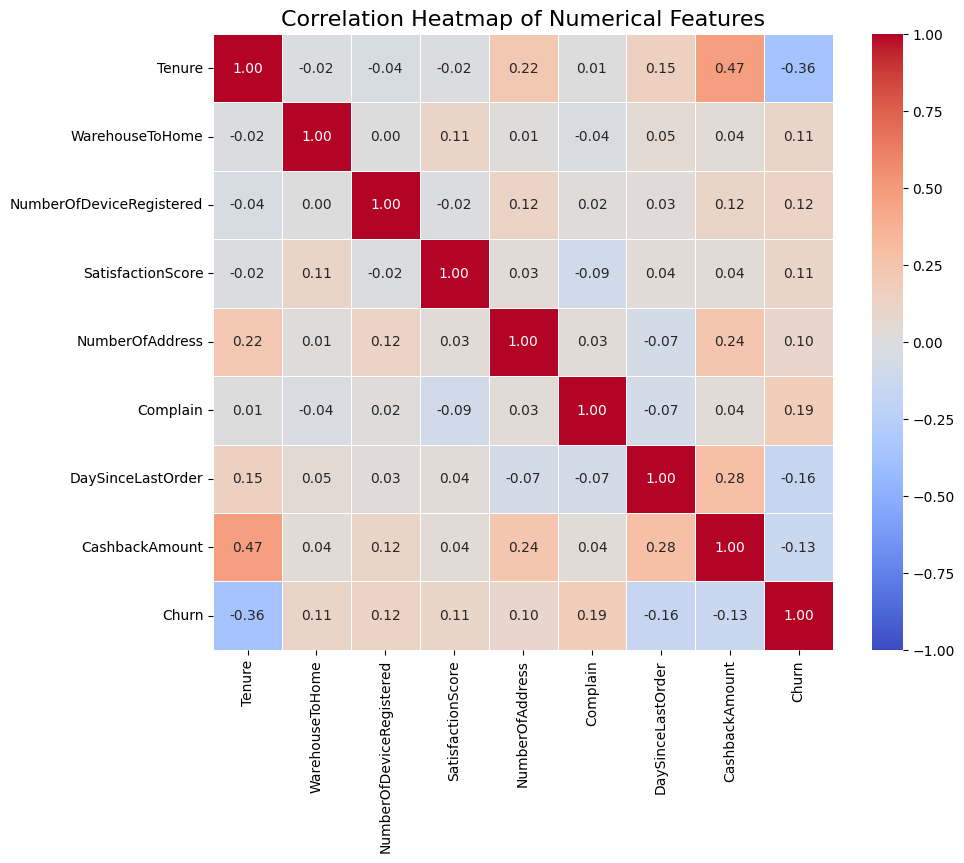

In [9]:
# Generating the correlation heatmap for numerical columns in the dataset
import numpy as np

# Selecting numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculating the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

#Strong Correlations:
#Tenure and CashbackAmount (0.47): Indicates a moderate positive relationship, suggesting that customers with higher tenure are likely to receive more cashback.
#Tenure and Churn (-0.36): Indicates a moderate negative relationship, meaning that customers with longer tenure are less likely to churn.

#Weak to No Significant Correlations:
#Most other pairs, such as WarehouseToHome and CashbackAmount (0.04) or SatisfactionScore and Churn (0.11), show weak correlations, suggesting minimal or no linear relationships.
#Interesting Observations:

##NumberOfAddress has a small positive correlation with CashbackAmount (0.24), possibly suggesting that customers with multiple addresses receive slightly higher cashback.
#DaySinceLastOrder and CashbackAmount (0.28) show a weak positive correlation, hinting that more time since the last order might result in higher cashback.'''

In [10]:
from sklearn.preprocessing import LabelEncoder

# Creating a LabelEncoder instance
encoder = LabelEncoder()

# Encoding categorical features
df["MaritalStatus"] = encoder.fit_transform(df["MaritalStatus"])
df["PreferedOrderCat"] = encoder.fit_transform(df["PreferedOrderCat"])

# Display the updated DataFrame
print(df.head())

#interpretation:
#Before Encoding:
#MaritalStatus: ['Single', 'Married', 'Divorced']
#PreferedOrderCat: ['Laptop & Accessory', 'Mobile', 'Fashion', 'Others']

#after Encoding:
##MaritalStatus: [0, 1, 2]
#PreferedOrderCat: [0, 1, 2, 3] (encoding order may vary depending on the data).

   Tenure  WarehouseToHome  NumberOfDeviceRegistered  PreferedOrderCat  \
0    15.0             29.0                         4                 2   
1     7.0             25.0                         4                 3   
2    27.0             13.0                         3                 2   
3    20.0             25.0                         4                 0   
4    30.0             15.0                         4                 5   

   SatisfactionScore  MaritalStatus  NumberOfAddress  Complain  \
0                  3              2                2         0   
1                  1              1                2         0   
2                  1              1                5         0   
3                  3              0                7         0   
4                  4              2                8         0   

   DaySinceLastOrder  CashbackAmount  Churn  
0                7.0             143      0  
1                7.0             129      0  
2                7.0

In [11]:
# 1. Check dependent and independent variables
print("Step 1: Variable Information")
print("\nDependent Variable (Target):")
print("Churn")
print("\nIndependent Variables (Features):")
print(df.columns.drop('Churn').tolist())

Step 1: Variable Information

Dependent Variable (Target):
Churn

Independent Variables (Features):
['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount']


In [12]:
# 3. Divide data into independent and dependent variables
features = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 
           'SatisfactionScore', 'NumberOfAddress', 'Complain', 
           'DaySinceLastOrder', 'CashbackAmount']

X = df[features]
y = df['Churn']

print("\nStep 3: Data Division")
print("Independent variables shape:", X.shape)
print("Dependent variable shape:", y.shape)

#The dataset has been successfully split into features (X) and target (y).
#The number of records in both is the same (499), ensuring no data loss.
#The dependent variable is one-dimensional, confirming that this is a binary classification problem (Churn vs. No Churn).


Step 3: Data Division
Independent variables shape: (499, 8)
Dependent variable shape: (499,)


In [13]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve, auc
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=21, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)   

In [14]:
# Create and train the MLP
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

# Train the model
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

In [15]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       165
           1       0.13      0.06      0.08        35

    accuracy                           0.77       200
   macro avg       0.48      0.49      0.47       200
weighted avg       0.70      0.77      0.73       200



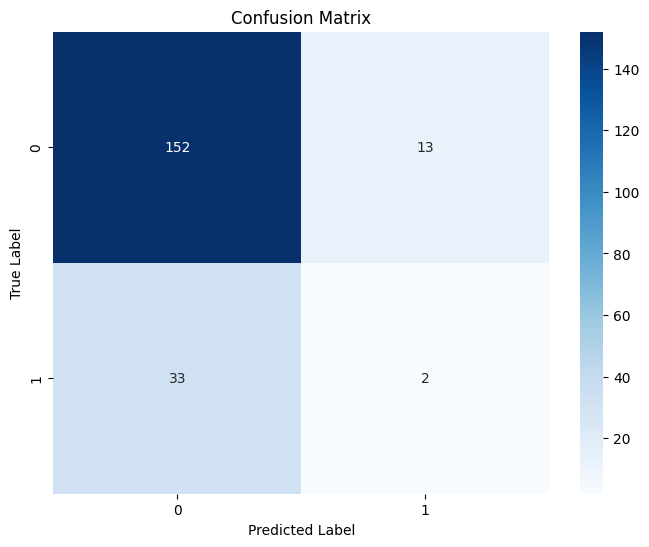

In [16]:
# Create confusion matrix visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [17]:
 from sklearn.metrics import accuracy_score
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7700


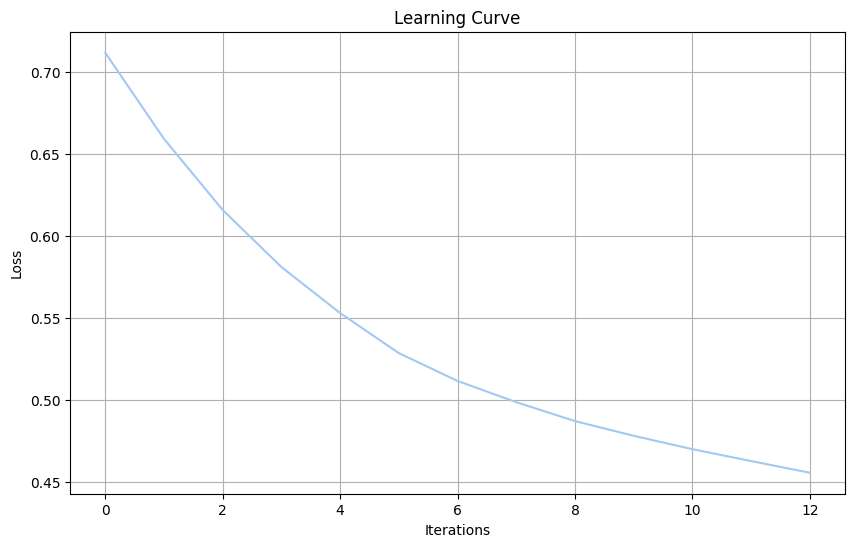

In [18]:
# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_)
plt.title('Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

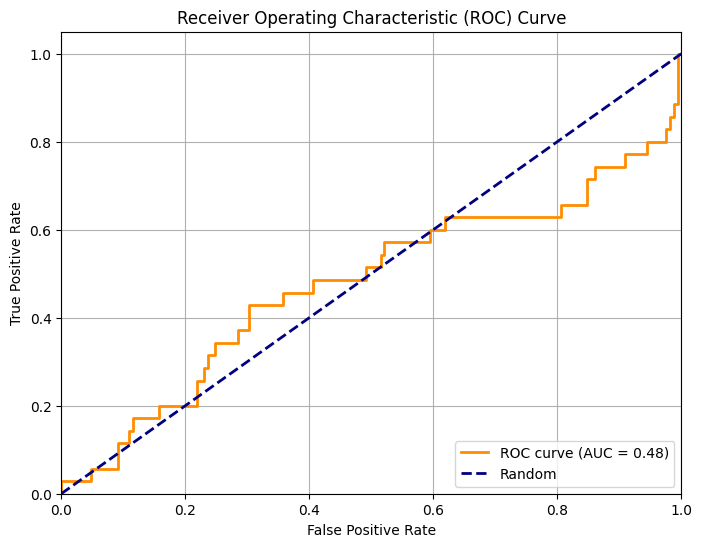

In [19]:
# Calculate ROC curve and AUC
from sklearn.metrics import roc_curve, auc
y_pred_proba = mlp.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [20]:
# Feature importance analysis
feature_importance = np.abs(mlp.coefs_[0]).mean(axis=1)
feature_names = X.columns

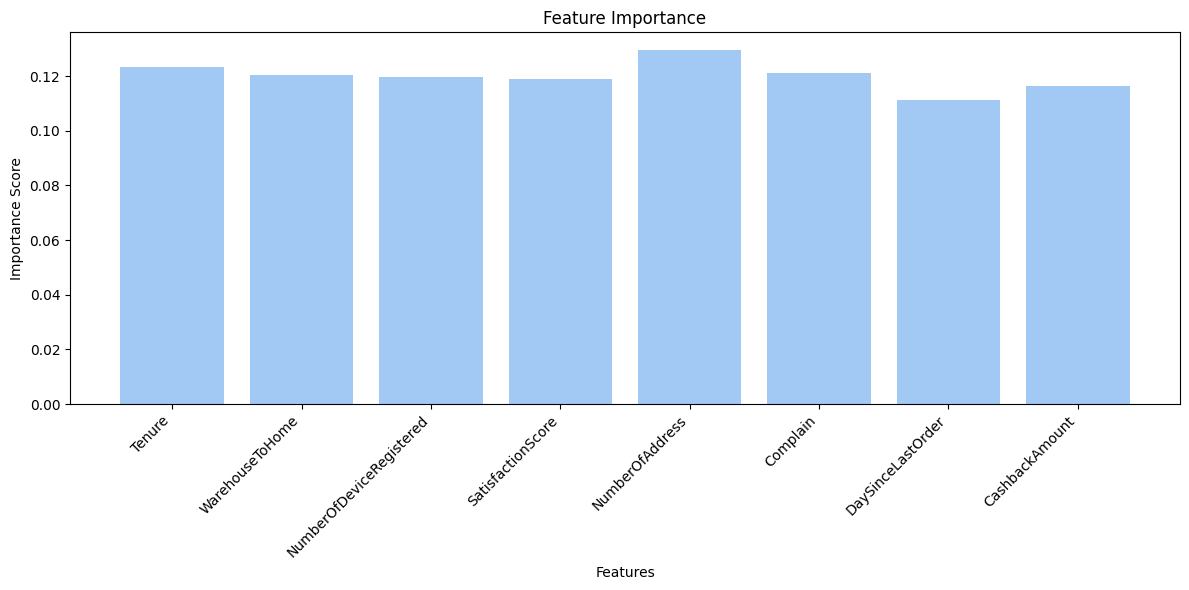

In [21]:
# Plot feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_names, feature_importance)
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

In [22]:
# Print model performance metrics
print("\nModel Performance Metrics:")
print(f"Training set score: {mlp.score(X_train, y_train):.3f}")
print(f"Test set score: {mlp.score(X_test, y_test):.3f}")
print(f"Number of iterations: {mlp.n_iter_}")
print(f"Number of layers: {len(mlp.coefs_)}")
print("Layer sizes:", [layer.shape for layer in mlp.coefs_])


Model Performance Metrics:
Training set score: 0.786
Test set score: 0.770
Number of iterations: 13
Number of layers: 3
Layer sizes: [(8, 100), (100, 50), (50, 1)]


In [23]:
# Define parameter grid for Grid Search
from sklearn.model_selection import train_test_split, GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [1000],
    'early_stopping': [True],
    'validation_fraction': [0.1]
}

# Initialize the MLP Classifier
mlp = MLPClassifier(random_state=42)

# Perform Grid Search with cross-validation
print("Starting Grid Search...")
grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='f1',
    verbose=2
)

# Fit Grid Search
grid_search.fit(X_train, y_train)

Starting Grid Search...
Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py:409: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(param_list)


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'early_stopping': [True],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 50), (100, 100)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [1000], 'validation_fraction': [0.1]},
             scoring='f1', verbose=2)

In [24]:
# Print Grid Search results
print("\nGrid Search Results:")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.3f}")

# Get the best model
best_mlp = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_mlp.predict(X_test)
y_pred_proba = best_mlp.predict_proba(X_test)[:, 1]

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Grid Search Results:
Best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'early_stopping': True, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 1000, 'validation_fraction': 0.1}
Best cross-validation score: 0.435

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.77      0.86       165
           1       0.46      0.91      0.61        35

    accuracy                           0.80       200
   macro avg       0.72      0.84      0.74       200
weighted avg       0.89      0.80      0.82       200



<h2>Key Insights</h2>

<span><strong>Class Imbalance:</strong> The dataset is imbalanced (165 non-churners vs 35 churners).</span>

<h2>Model Bias</h2>

<span><strong>Very good at identifying non-churners:</strong> 98% precision.</span>  
<span><strong>Less reliable for predicting churners:</strong> 46% precision.</span>

<h2>Churn Detection</h2>

<span><strong>High recall (0.91) for churners:</strong> The model rarely misses actual churners.</span>  
<span><strong>Low precision (0.46):</strong> The model tends to overpredict churn.</span>

<h2>Business Impact</h2>

<span><strong>Better at identifying customers who will stay.</strong></span>  
<span><strong>May flag too many customers as potential churners.</strong></span>  
<span><strong>Useful for customer retention</strong> if false positives are acceptable.</span>
